## Objectives:-

### Data prepare: 
100 students ka clean CSV dataset banana (ID, Name, Gender, City, 5 subject marks).

### Basic statistics:
har subject ka mean, median, std, min, max nikalna.

### Performance analysis:
total & percentage calculate karke pass/fail, grade, toppers nikalna.

### Comparisons & trends:
subject-wise average, city-wise performance, gender-wise comparison.

### Visualizations:
histograms, boxplots, bar charts, heatmap (correlation), scatter/regression jaisa EDA plots banana.

### Insights & report:
top 10 students, weak topics identify karna aur short recommendations likhna.

### Deliverables:
students_marks_100.csv, Jupyter notebook with code + visualizations, short PDF report/slides.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("students_marks_100.csv")
df

,ID,Name,Gender,City,Math,Science,English,History,Computer
0,1,Reyansh Gupta,Female,Kolkata,65,42,81,71,66
1,2,Anika Kumar,Female,Pune,74,79,67,69,59
2,3,Reyansh Chopra,Male,Ahmedabad,88,49,75,54,88
3,4,Ira Agarwal,Male,Pune,70,74,70,66,72
4,5,Ananya Kumar,Female,Ahmedabad,72,66,55,69,71
...,...,...,...,...,...,...,...,...,...
95,96,Navya Patel,Male,Ahmedabad,79,57,68,37,90
96,97,Arjun Gupta,Male,Kolkata,59,84,77,62,79
97,98,Vivaan Patel,Male,Hyderabad,48,60,68,76,74
98,99,Ananya Sharma,Female,Chennai,55,74,76,52,73


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        100 non-null    int64 
 1   Name      100 non-null    object
 2   Gender    100 non-null    object
 3   City      100 non-null    object
 4   Math      100 non-null    int64 
 5   Science   100 non-null    int64 
 6   English   100 non-null    int64 
 7   History   100 non-null    int64 
 8   Computer  100 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 7.2+ KB


In [4]:
df.describe()

,ID,Math,Science,English,History,Computer
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,65.830000,68.150000,71.530000,60.960000,75.530000
std,29.011492,12.253266,10.940034,11.975105,15.541356,10.797919
min,1.000000,37.000000,33.000000,45.000000,24.000000,39.000000
25%,25.750000,57.000000,61.000000,64.750000,51.000000,69.000000
50%,50.500000,66.000000,69.000000,72.000000,62.500000,76.000000
75%,75.250000,74.000000,74.000000,78.000000,71.000000,84.000000
max,100.000000,100.000000,93.000000,99.000000,100.000000,100.000000


In [5]:
subjects = ["Math", "Science", "English", "History", "Computer"]

df["Total"] = df[subjects].sum(axis = 1)
df["Percentage"] = df["Total"] / len(subjects)

df["Result"] = df[subjects].apply(lambda row : "Fail" if (row < 33).any() else "Pass", axis = 1)

def grade(p):
    if p >= 90: return "A+"
    if p >= 80: return "A"
    if p >= 70: return "B+"
    if p >= 60: return "B"
    if p >= 50: return "C"
    if p >= 33: return "D"
    return "F"

df["Grade"] = df["Percentage"].round(2).apply(grade)
    
df

,ID,Name,Gender,City,Math,Science,English,History,Computer,Total,Percentage,Result,Grade
0,1,Reyansh Gupta,Female,Kolkata,65,42,81,71,66,325,65.0,Pass,B
1,2,Anika Kumar,Female,Pune,74,79,67,69,59,348,69.6,Pass,B
2,3,Reyansh Chopra,Male,Ahmedabad,88,49,75,54,88,354,70.8,Pass,B+
3,4,Ira Agarwal,Male,Pune,70,74,70,66,72,352,70.4,Pass,B+
4,5,Ananya Kumar,Female,Ahmedabad,72,66,55,69,71,333,66.6,Pass,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Navya Patel,Male,Ahmedabad,79,57,68,37,90,331,66.2,Pass,B
96,97,Arjun Gupta,Male,Kolkata,59,84,77,62,79,361,72.2,Pass,B+
97,98,Vivaan Patel,Male,Hyderabad,48,60,68,76,74,326,65.2,Pass,B
98,99,Ananya Sharma,Female,Chennai,55,74,76,52,73,330,66.0,Pass,B


### Pass vs Fail

In [7]:
pass_fail_count = df.groupby("Result").size()
pass_fail_count

Result
Fail     5
Pass    95
dtype: int64

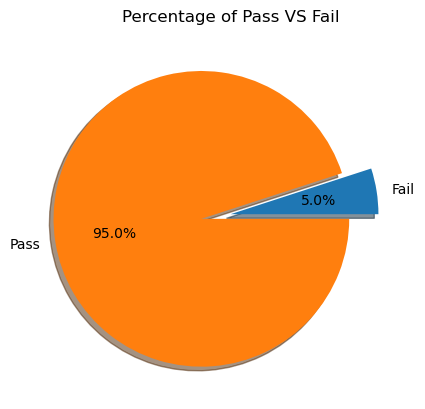

In [8]:
explode = [0,0.2]
plt.pie(
    pass_fail_count, 
    labels=pass_fail_count.index, 
    autopct="%1.1f%%", 
    explode=explode, 
    shadow=True
)
plt.title("Percentage of Pass VS Fail")
plt.show()


C:\Users\afaqu\AppData\Local\Temp\ipykernel_11488\1624423941.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Result", data=df, palette="viridis")


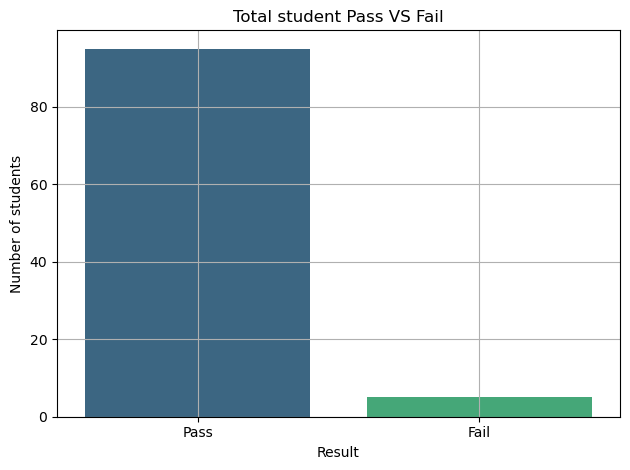

In [9]:
sns.countplot(x="Result", data=df, palette="viridis")
plt.title("Total student Pass VS Fail")
plt.xlabel("Result")
plt.ylabel("Number of students")
plt.tight_layout()
plt.grid(True)
plt.show()

### Percentage distribution

In [47]:
df.nlargest(1, 'Percentage')

,ID,Name,Gender,City,Math,Science,English,History,Computer,Total,Percentage,Result,Grade
94,95,Ananya Kumar,Male,Ahmedabad,75,91,78,92,71,407,81.4,Pass,A


In [48]:
df.nsmallest(1, 'Percentage')

,ID,Name,Gender,City,Math,Science,English,History,Computer,Total,Percentage,Result,Grade
52,53,Arjun Singh,Female,Bengaluru,46,62,53,36,70,267,53.4,Pass,C


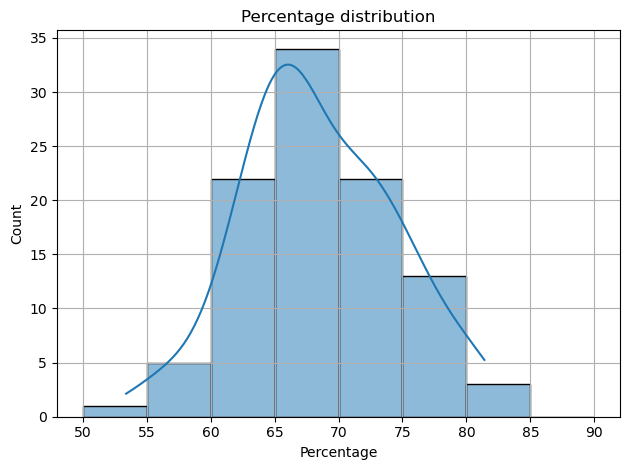

In [50]:
bins = [50,55,60,65,70,75,80,85,90]
sns.histplot(x = 'Percentage', data=df, bins=bins, kde=True)
plt.title("Percentage distribution")
plt.tight_layout()
plt.grid(True)
plt.show()

### Marks distribution

In [51]:
df.nlargest(1, 'Total')

,ID,Name,Gender,City,Math,Science,English,History,Computer,Total,Percentage,Result,Grade
94,95,Ananya Kumar,Male,Ahmedabad,75,91,78,92,71,407,81.4,Pass,A


In [52]:
df.nsmallest(1, 'Total')

,ID,Name,Gender,City,Math,Science,English,History,Computer,Total,Percentage,Result,Grade
52,53,Arjun Singh,Female,Bengaluru,46,62,53,36,70,267,53.4,Pass,C


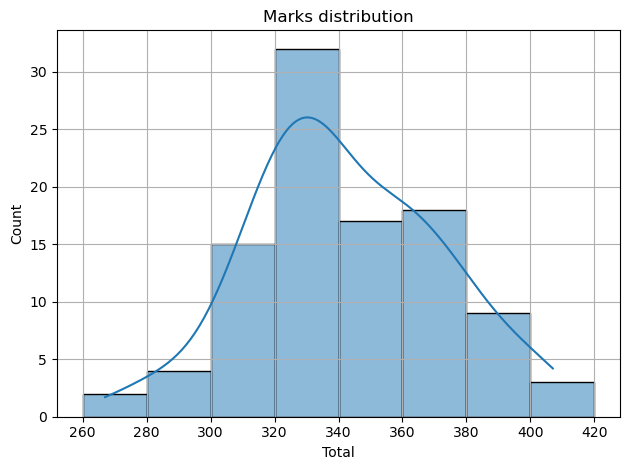

In [53]:
bins = [260,280,300,320,340,360,380,400,420]
sns.histplot(x = 'Total', data=df, bins=bins, kde=True)
plt.title("Marks distribution")
plt.tight_layout()
plt.grid(True)
plt.show()

In [10]:
pass_fail_gender_count = df.groupby(["Gender", "Result"]).size().unstack(fill_value=0)
pass_fail_gender_count

Result,Fail,Pass
Gender,,
Female,2,51
Male,3,44


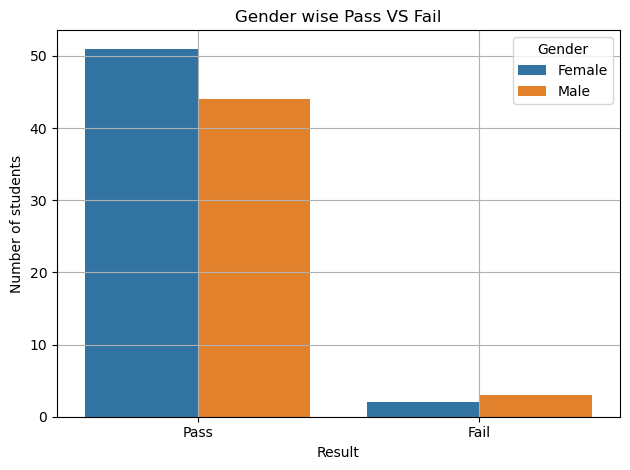

In [11]:
sns.countplot(x = "Result", data=df, hue="Gender")
plt.title("Gender wise Pass VS Fail")
plt.xlabel("Result")
plt.ylabel("Number of students")
plt.tight_layout()
plt.grid(True)
plt.show()

In [12]:
df.groupby(["City", "Result"]).size().unstack(fill_value=0)

Result,Fail,Pass
City,,
Ahmedabad,0,18
Bengaluru,0,8
Chennai,0,9
Delhi,1,8
Hyderabad,1,13
Jaipur,0,6
Kolkata,0,11
Lucknow,0,6
Mumbai,1,5


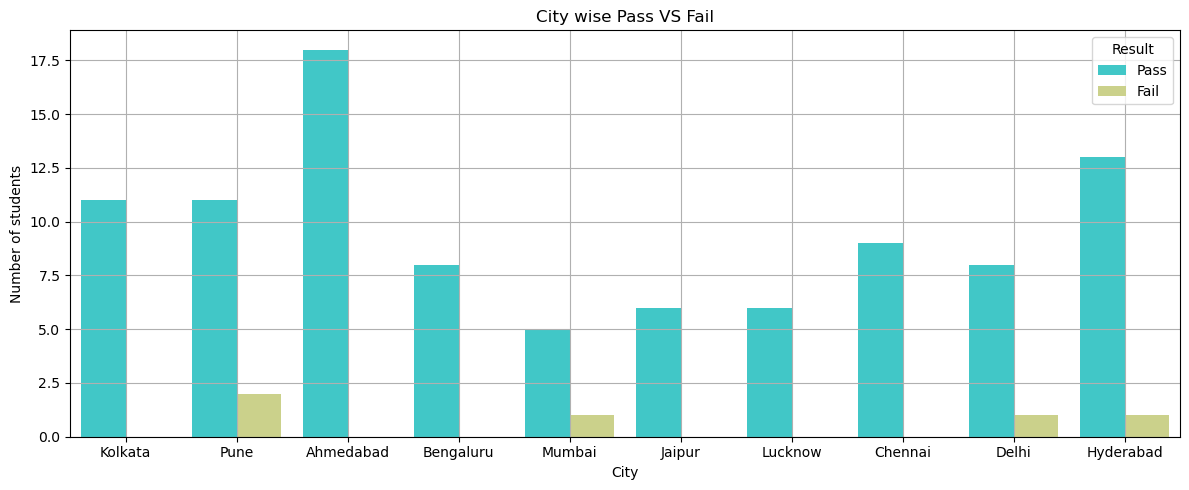

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(x='City', data=df, palette='rainbow', hue='Result',)
plt.title("City wise Pass VS Fail")
plt.xlabel("City")
plt.ylabel("Number of students")
plt.tight_layout()
plt.grid(True)
plt.show()

## Grade

In [14]:
grade_count = df.groupby("Grade").size()
grade_count

Grade
A      3
B     56
B+    35
C      6
dtype: int64

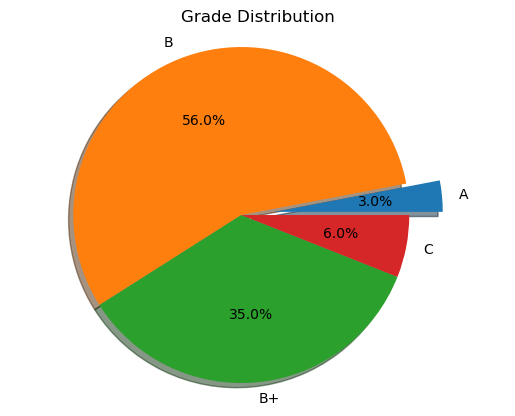

In [15]:
explode = [0.2,0,0,0]
grade = ["A", "B", "B+", "C"]
plt.pie(
    grade_count, 
    labels=grade,
    autopct= "%1.1f%%",
    explode=explode, 
    shadow=True
)

plt.title("Grade Distribution")
plt.axis("equal")
plt.show()

## Top 10

In [16]:
top_10 = df.nlargest(10, "Total")
top_10

,ID,Name,Gender,City,Math,Science,English,History,Computer,Total,Percentage,Result,Grade
94,95,Ananya Kumar,Male,Ahmedabad,75,91,78,92,71,407,81.4,Pass,A
42,43,Aarav Kumar,Male,Chennai,78,80,66,100,82,406,81.2,Pass,A
46,47,Aarav Mehta,Male,Chennai,79,71,98,79,77,404,80.8,Pass,A
28,29,Krishna Gupta,Female,Kolkata,88,53,90,67,100,398,79.6,Pass,B+
64,65,Reyansh Gupta,Female,Ahmedabad,87,62,90,66,92,397,79.4,Pass,B+
47,48,Rudra Agarwal,Male,Mumbai,75,87,63,88,82,395,79.0,Pass,B+
51,52,Aarav Agarwal,Female,Lucknow,100,74,92,50,74,390,78.0,Pass,B+
10,11,Aarav Chopra,Female,Pune,68,59,89,85,85,386,77.2,Pass,B+
12,13,Navya Chopra,Female,Chennai,70,72,79,64,99,384,76.8,Pass,B+
85,86,Navya Kumar,Male,Hyderabad,75,82,92,64,69,382,76.4,Pass,B+


C:\Users\afaqu\AppData\Local\Temp\ipykernel_11488\778092574.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Total", y = "Name", data = top_10, palette="viridis")


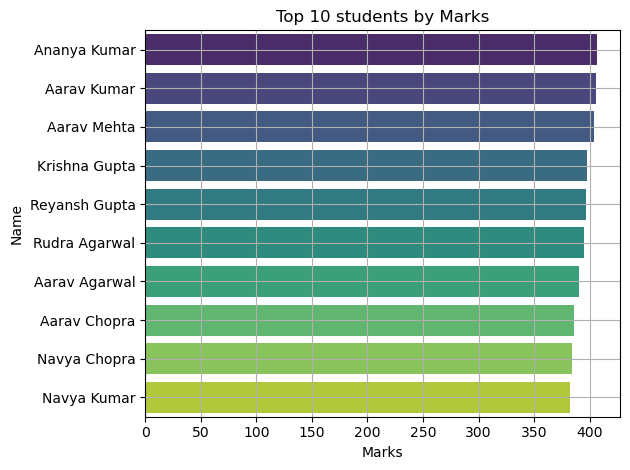

In [17]:
sns.barplot(x = "Total", y = "Name", data = top_10, palette="viridis")

plt.title("Top 10 students by Marks")
plt.xlabel("Marks")
plt.ylabel("Name")
plt.tight_layout()
plt.grid(True)

In [18]:
bottom_10 = df.nsmallest(10, "Total")
bottom_10

,ID,Name,Gender,City,Math,Science,English,History,Computer,Total,Percentage,Result,Grade
52,53,Arjun Singh,Female,Bengaluru,46,62,53,36,70,267,53.4,Pass,C
20,21,Pari Verma,Female,Pune,66,60,57,28,67,278,55.6,Fail,C
16,17,Aditya Mehta,Female,Bengaluru,57,58,63,34,71,283,56.6,Pass,C
81,82,Navya Sharma,Female,Jaipur,54,73,51,59,49,286,57.2,Pass,C
14,15,Aadhya Agarwal,Male,Delhi,71,59,66,27,69,292,58.4,Fail,C
60,61,Rudra Singh,Male,Jaipur,67,33,68,52,75,295,59.0,Pass,C
19,20,Meera Gupta,Female,Mumbai,50,84,68,27,73,302,60.4,Fail,B
87,88,Vivaan Verma,Male,Ahmedabad,42,74,59,64,66,305,61.0,Pass,B
41,42,Reyansh Yadav,Male,Kolkata,58,61,72,47,68,306,61.2,Pass,B
44,45,Navya Kumar,Male,Pune,47,61,85,24,89,306,61.2,Fail,B


C:\Users\afaqu\AppData\Local\Temp\ipykernel_11488\1101788584.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Total", y = "Name", data = bottom_10, palette='rainbow')


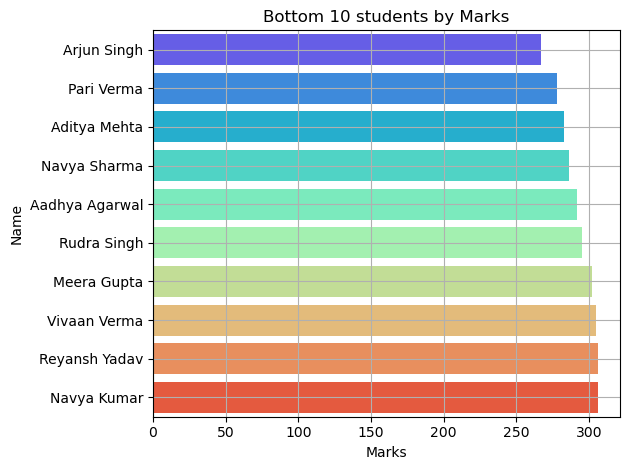

In [20]:
sns.barplot(x = "Total", y = "Name", data = bottom_10, palette='rainbow')

plt.title("Bottom 10 students by Marks")
plt.xlabel("Marks")
plt.ylabel("Name")
plt.tight_layout()
plt.grid(True)

In [21]:
Pass = df.query("Result == 'Pass'")
Pass

,ID,Name,Gender,City,Math,Science,English,History,Computer,Total,Percentage,Result,Grade
0,1,Reyansh Gupta,Female,Kolkata,65,42,81,71,66,325,65.0,Pass,B
1,2,Anika Kumar,Female,Pune,74,79,67,69,59,348,69.6,Pass,B
2,3,Reyansh Chopra,Male,Ahmedabad,88,49,75,54,88,354,70.8,Pass,B+
3,4,Ira Agarwal,Male,Pune,70,74,70,66,72,352,70.4,Pass,B+
4,5,Ananya Kumar,Female,Ahmedabad,72,66,55,69,71,333,66.6,Pass,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Navya Patel,Male,Ahmedabad,79,57,68,37,90,331,66.2,Pass,B
96,97,Arjun Gupta,Male,Kolkata,59,84,77,62,79,361,72.2,Pass,B+
97,98,Vivaan Patel,Male,Hyderabad,48,60,68,76,74,326,65.2,Pass,B
98,99,Ananya Sharma,Female,Chennai,55,74,76,52,73,330,66.0,Pass,B


In [22]:
Fail = df.query("Result == 'Fail'")
Fail

,ID,Name,Gender,City,Math,Science,English,History,Computer,Total,Percentage,Result,Grade
14,15,Aadhya Agarwal,Male,Delhi,71,59,66,27,69,292,58.4,Fail,C
19,20,Meera Gupta,Female,Mumbai,50,84,68,27,73,302,60.4,Fail,B
20,21,Pari Verma,Female,Pune,66,60,57,28,67,278,55.6,Fail,C
38,39,Anika Mehta,Male,Hyderabad,84,71,73,29,58,315,63.0,Fail,B
44,45,Navya Kumar,Male,Pune,47,61,85,24,89,306,61.2,Fail,B


In [23]:
city_wise_result = df.groupby("City")["Total"].agg(
    Avg_Score = "mean",
    Low_Score = "min",
    High_Score = "max"
)
city_wise_result

,Avg_Score,Low_Score,High_Score
City,,,
Ahmedabad,344.111111,305,407
Bengaluru,322.875000,267,363
Chennai,372.555556,330,406
Delhi,334.222222,292,371
Hyderabad,335.285714,309,382
Jaipur,329.333333,286,381
Kolkata,349.000000,306,398
Lucknow,356.500000,325,390
Mumbai,338.500000,302,395


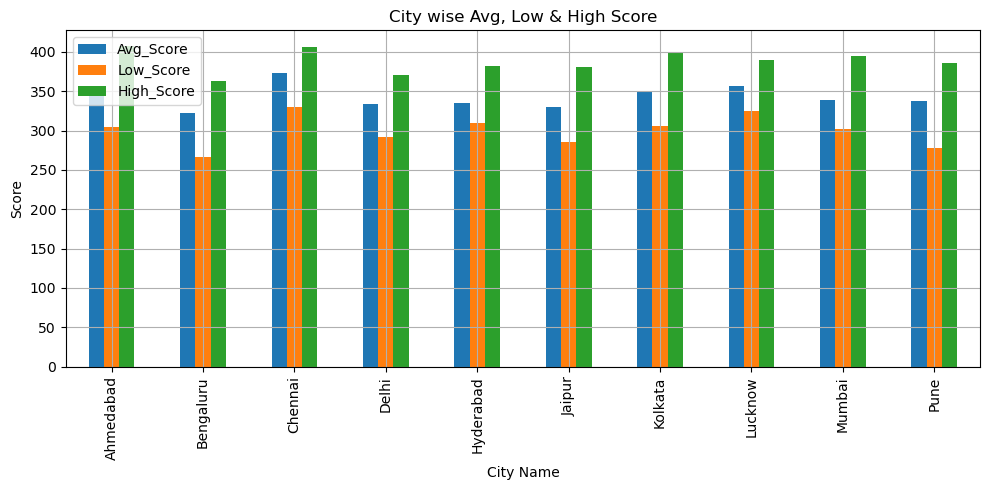

In [24]:

city_wise_result.plot(kind = 'bar', figsize=(10,5))
plt.title("City wise Avg, Low & High Score")
plt.xlabel("City Name")
plt.ylabel("Score")
plt.tight_layout()
plt.grid(True)
plt.show()

In [67]:
per = df["Percentage"].agg(
    Avg_Percent = "mean",
    Low_Percent = "min",
    High_Percent = "max"
)
per

Avg_Percent     68.4
Low_Percent     53.4
High_Percent    81.4
Name: Percentage, dtype: float64

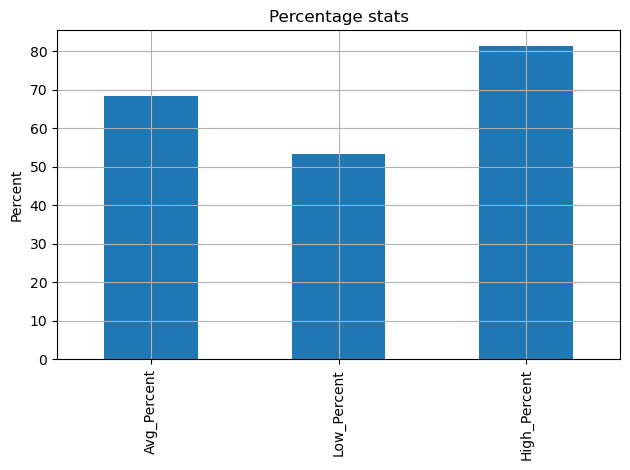

In [70]:
per.plot(kind='bar')
plt.title("Percentage stats")
plt.ylabel("Percent")
plt.tight_layout()
plt.grid(True)
plt.show()

In [71]:
tot = df["Total"].agg(
    Avg_Score = "mean",
    Low_Score = "min",
    High_Score = "max"
)
tot

Avg_Score     342.0
Low_Score     267.0
High_Score    407.0
Name: Total, dtype: float64

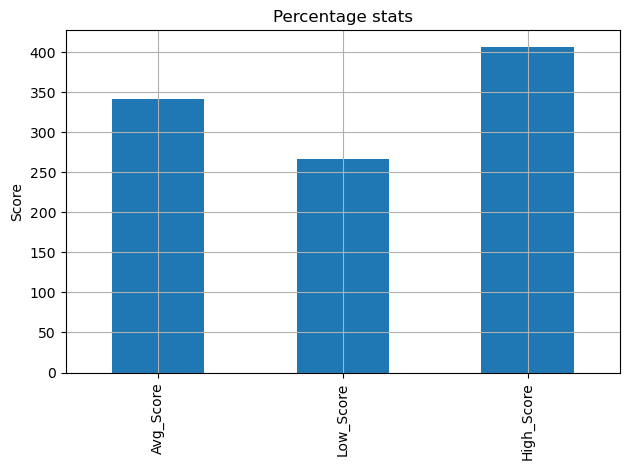

In [73]:
tot.plot(kind='bar')
plt.title("Percentage stats")
plt.ylabel("Score")
plt.tight_layout()
plt.grid(True)
plt.show()

In [77]:
gender_per = df.groupby("Gender")["Percentage"].agg(
    Avg_Score = "mean",
    Low_Score = "min",
    High_Score = "max"
)
gender_per

,Avg_Score,Low_Score,High_Score
Gender,,,
Female,68.766038,53.4,79.6
Male,67.987234,58.4,81.4


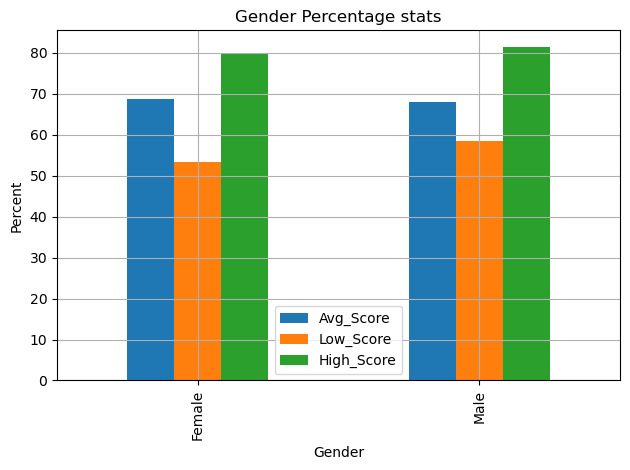

In [78]:
gender_per.plot(kind='bar')
plt.title("Gender Percentage stats")
plt.ylabel("Percent")
plt.tight_layout()
plt.grid(True)
plt.show()

In [79]:
gender_score = df.groupby("Gender")["Total"].agg(
    Avg_Score = "mean",
    Low_Score = "min",
    High_Score = "max"
)
gender_score

,Avg_Score,Low_Score,High_Score
Gender,,,
Female,343.830189,267,398
Male,339.936170,292,407


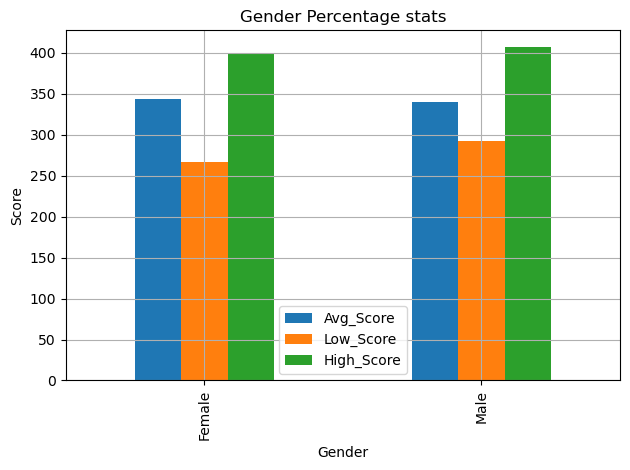

In [81]:
gender_score.plot(kind='bar')
plt.title("Gender Percentage stats")
plt.ylabel("Score")
plt.tight_layout()
plt.grid(True)
plt.show()

### Subject relation

In [60]:
subjects = ["Math", "Science", "English", "History", "Computer"]

stats = df[subjects].agg(["mean", "min", "max", "std", "median"])
stats


,Math,Science,English,History,Computer
mean,65.830000,68.150000,71.530000,60.960000,75.530000
min,37.000000,33.000000,45.000000,24.000000,39.000000
max,100.000000,93.000000,99.000000,100.000000,100.000000
std,12.253266,10.940034,11.975105,15.541356,10.797919
median,66.000000,69.000000,72.000000,62.500000,76.000000


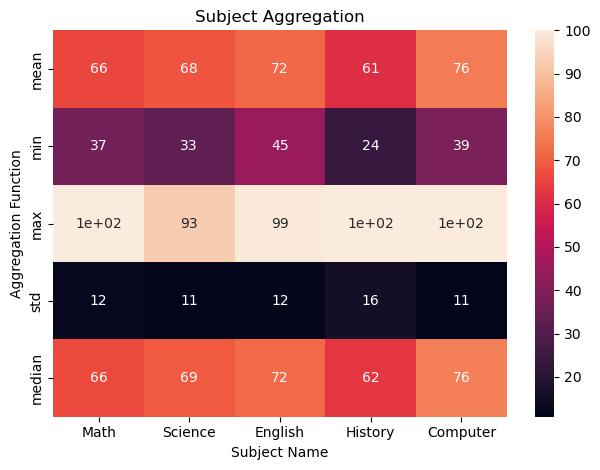

In [58]:
sns.heatmap(stats, annot=True)
plt.title("Subject Aggregation")
plt.xlabel('Subject Name')
plt.ylabel("Aggregation Function")
plt.tight_layout()
plt.show()

### Math toppers

In [40]:
Maths_topper = df.nlargest(5, 'Math').reset_index(drop=True)
Maths_topper[['ID', 'Name', 'City', 'Math']]

,ID,Name,City,Math
0,52,Aarav Agarwal,Lucknow,100
1,58,Aarav Mehta,Ahmedabad,89
2,3,Reyansh Chopra,Ahmedabad,88
3,29,Krishna Gupta,Kolkata,88
4,10,Vivaan Mehta,Ahmedabad,87


### Science toppers

In [42]:
Maths_topper = df.nlargest(5, 'Science').reset_index(drop=True)
Maths_topper[['ID', 'Name', 'City', 'Science']]

,ID,Name,City,Science
0,66,Diya Agarwal,Delhi,93
1,95,Ananya Kumar,Ahmedabad,91
2,76,Sai Kumar,Pune,89
3,80,Anika Patel,Hyderabad,88
4,48,Rudra Agarwal,Mumbai,87


### English Toppers

In [43]:
Maths_topper = df.nlargest(5, 'English').reset_index(drop=True)
Maths_topper[['ID', 'Name', 'City', 'English']]

,ID,Name,City,English
0,70,Sai Gupta,Lucknow,99
1,47,Aarav Mehta,Chennai,98
2,12,Aadhya Yadav,Jaipur,96
3,89,Arjun Sharma,Hyderabad,96
4,19,Ishaan Agarwal,Mumbai,92


### History toppers

In [44]:
Maths_topper = df.nlargest(5, 'History').reset_index(drop=True)
Maths_topper[['ID', 'Name', 'City', 'History']]

,ID,Name,City,History
0,43,Aarav Kumar,Chennai,100
1,41,Anika Sharma,Chennai,92
2,95,Ananya Kumar,Ahmedabad,92
3,48,Rudra Agarwal,Mumbai,88
4,36,Pari Agarwal,Delhi,86


### Computer toppers

In [45]:
Maths_topper = df.nlargest(5, 'Computer').reset_index(drop=True)
Maths_topper[['ID', 'Name', 'City', 'Computer']]

,ID,Name,City,Computer
0,29,Krishna Gupta,Kolkata,100
1,91,Vivaan Mehta,Chennai,100
2,13,Navya Chopra,Chennai,99
3,14,Saanvi Singh,Chennai,94
4,65,Reyansh Gupta,Ahmedabad,92
